# Aadvik's Limb Brightening Code Stuff

We are attempting to adjust SRTC++ to have a method by which we can replicate Titan's limb brightening/darkening.

The theory is that this relies on the interplay between methane absorption and haze scattering differences with the altitude of Titan. 

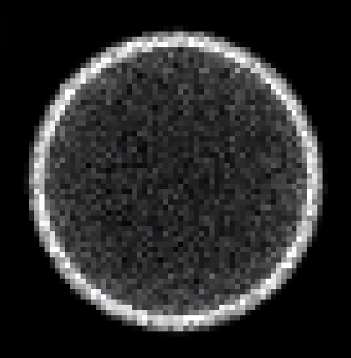

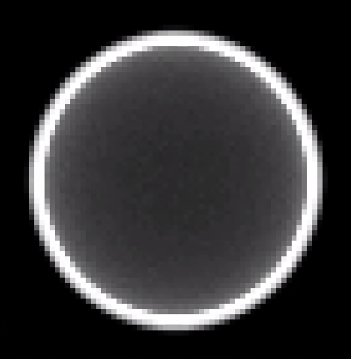

An example of a simulation using uniform absorption and uniform haze on a "coal black" Titan. Limb brightening is observed. Settings are 1e-2 for haze and 1e-6 for extinction. Second one is the same but run with more photons.



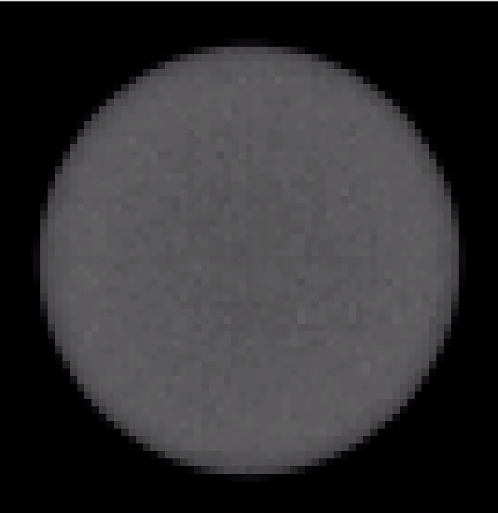

Uniform example, high haze optical depth (1) with abosrption of 1e-6. (total optical depth from space to surface at 90 degrees incidence or emission). Resutls with high values of haze are uniform. Uniform occurs when both values are high as well. And with high values of absorption as well. 

So in conclusion, the limb brightening and darkening effects only occur in the low optical depth regines. Which is not what we see in Titan which is genreally optically thick. Five microns may behave like this, but that's not our primary observation purpose here.



Now, with luck, we can try to do the limb brightening/darkening WITH vertical structure. Let's see!



### Vertical Structure

Luck is on our side, Vertical Structure has been created. We have a program that splits the atmosphere into two layers over a coal-black surface. The two layers each have three parametetrs that can be set: single scattering albedo, haze tau, and gas tau (that is, the optical depths). The single scattering albedo is kept fixed at 0.1 since it doesn't appear to change the overall behavior (just the intensity). The various optical depths, though, we do modify, and do so over a wide range.

So let's experiment. Let's set our optical depths only on a range of 0 to 1. Go ahead and test all of them this way. With four parameters and two options each we have sixteen different results, but some of them will be ambiguous. And some are trivial: the 0000 case is completely useless, for instance. 

In the cases we arrange them like so: lower haze, lower gas, upper haze, upper gas. This is simply because how it was arranged in the program without thinking. *Noncommital Shrug*. 

Since 0000 is useless, what of 0001? It's pure black, nothing to see. This is because if we have literally no haze scattering, where is the light going to scatter back to us? Nowhere. This also happens on 0100 and 0101; if you only abosrb there's nothing to look at. 

Well what of the reverse, when you only scatter? 1000, 0010, and 1010? This will result in vairous forms of the standard no-absorption simulations that were run before this. They look like so:

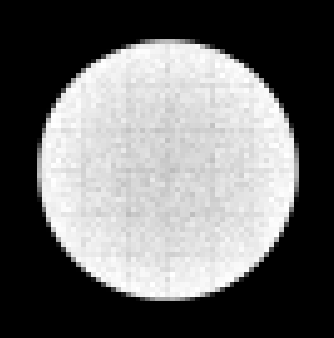

This is 1000 but they all look basically the same. Slight limb brightening. (The grid is an artifact from there not being a very high resolution in this simulation; all simulations can be run at higher precision at the expense of greater time)

So that takes care of all the isolated non-combination situations. What we really want is combinations. Let's start with the other "trivial" case: 1111, that is, everything is active.

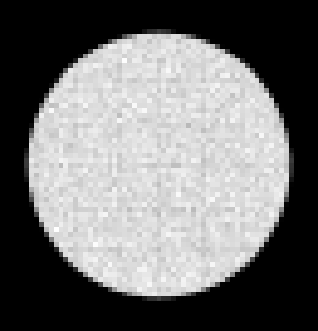

As we can tell this removes the limb brightening entirely, we have a uniform disc here now. 

With this we have considered all the "easy" cases. The ones that remain are 0111, 1011, 1101, 1110, 1100, 0011, 1001, 0110, which is where all our activities of interest occur. Let's just go through them one by one.

0111: lacking lower haze.

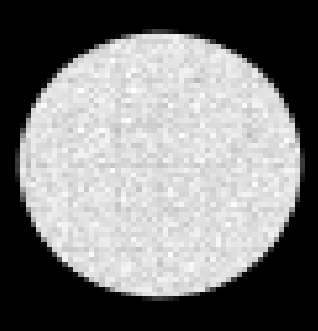

Similar lack of limb effects. 1011 is similar, as are 1100 and 0011, the setups for only one layer of the atmosphere having anything at all. (One might think that a bizarre outer atmosphere above absolutely nothing might have an odd effect, but evidentially not).

1101: Lacking upper haze.

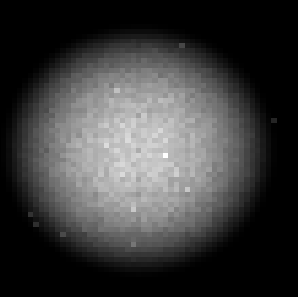

Clear limb *darkening*, thus showing that it is possible to get both over time. And this is one of the models somewhat close to Titan as well, haze hugs the moon rather closely.

1110: Lacking upper gas.

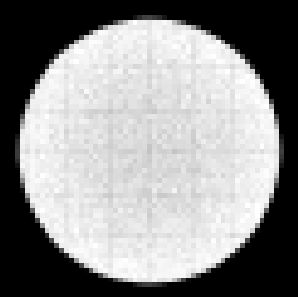

Limb brightening is clear. That said this is kind of the reverse of what we expect to see on Titan though, as the gas is more extensive than the haze. 

1001: Large absorption on top, large haze on bottom.

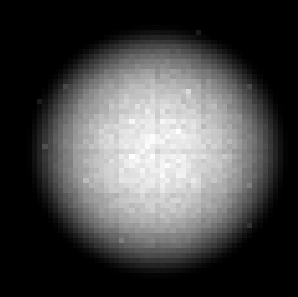

Clear limb darkening. Less extreme than 1101?

0110: Large haze on top, large absorption on bottom. 

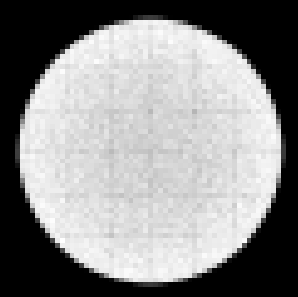

Clear limb brightening. More intense than 1110?

Now our primary theory source is https://iopscience.iop.org/article/10.1086/339826/pdf which has the following explanation for Titan's light behavior:

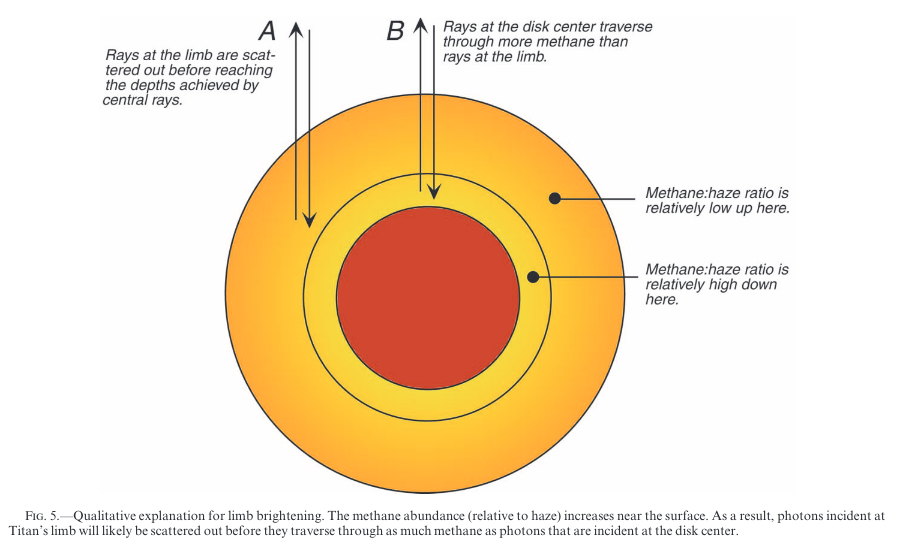

This is the explanation for Limb Brightening. Do we see Limb Brightening under conditions described? 

Well, we see when gas (methane) is 0 everywhere so that's not helpful. We also see it in 1110 and 0110. Assuming we map our two-atmosphere toy model to the above (also toy) model, this gives us us upper methane/haze of ~0 in both cases. The lower methane/haze ratio is either 1 or ~infinity depending on which model we use. So yes from a cursory inspection using xtremes, the methane/haze ratio appears to determine limb brightening. 

That said, in our cases, neither of our situations are realistic in the slightest because it pretends like there is no abosrbing gas at all in the lowest layer. That's simply not right at all. Note that we CAN conclude that the difference between the upper and lower layer is required, as when we tried other combinations we did not see limb brightening at all. 

## More Precise Experiments

Okay so now let's see what happens when we vary parameters. The interesting cases were 1101, 1001, 1110, and 0110. First, we wish to see if adjusting the overall magnitude will change the results, setting each "1" to "0.1". We start with 1101, as that is what we think is closest to how Titan actually is: no haze up high but yes on methane absorption up high. 

1101 at 0.1:

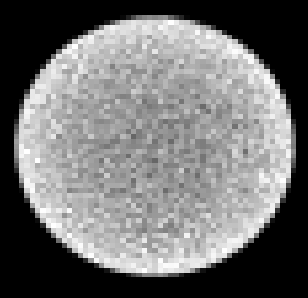

As we can see we are now in limb *brightening* while before we were in limb *darkening*. Which means that the overall optical depth of *everything* matters. What happens if we make it even thinner? Say, at 0.01? (the smallest nonzero value we would report in the file name).

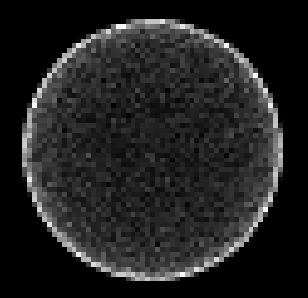

Limb brigtening intensifies. So, theoretically, somewhere in the middle we will arive at no brightening or darkening (or some freaky combination of the two). Where would that scale be? Try scaling to 0.5

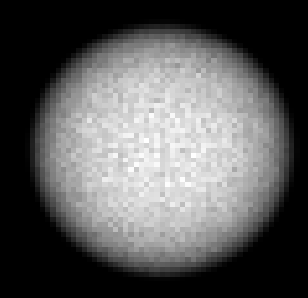

We have returned to limb darkening. So let's try to narrow down the crossover point...

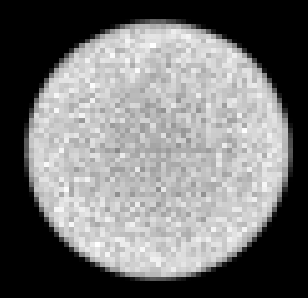

Which appears to be at optical depth 0.15. 

Anyway, we'll probably mess with those parameters more, but we do want to examine the way optical depth chnages the other cases of interest, 1001, 1110, and 0110.

1001 at 0.1:

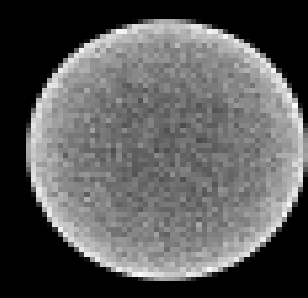

1001 at 0.01:

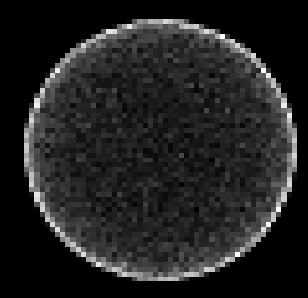

1110 at 0.1:

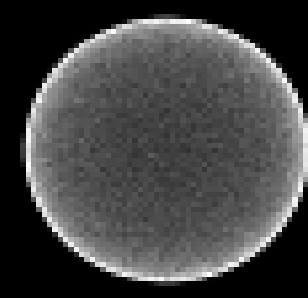

1110 at 0.01:

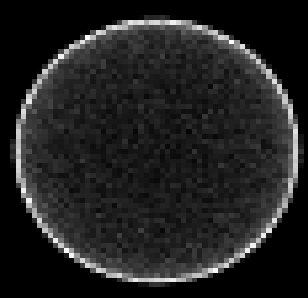

0110 at 0.1:

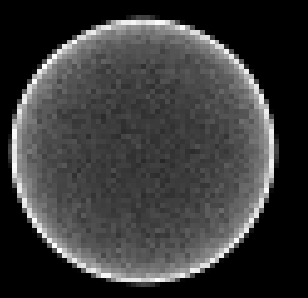

0110 at 0.01:

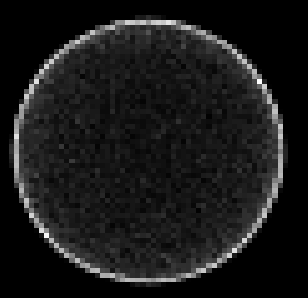

This gives us a very obvious result: no matter what the arrangement, in an optically thin regime we see limb brightening. It's not just the atmosphere's glow once the surface is out of the way, either, in all six images the "dark" disc grows in brightness toward the edge. So, rather simply, we can conclude that to get limb darkening you require an optically thick medium. 

## Restricting to Titan

As mentioned previously, 1101 is the case closest to what we expect to actually see on Titan, the case where there is no haze in the upper layer. The second closest is 1001, where there is absorption on top but not on the bottom, and the haze is restricted to the bottom, but this is notably unphysical. The real situation on Titan is where the absorption is in both layers, but is *stronger* on the bottom then on top. Furthermore the haze need not be *zero* in the upper atmosphere layer. So let's examine the variations we need to test: 

states with some haze value in the upper atmosphere for 1101.

states where the absorption changes from upper to lower atmosphere--we shall restrict these tests to higher lower atmosphere absorption. 

states where the absorption is low overall but the haze optial depth is very high. 

states in the reverse case: haze is almost not there, but absorption is high. 

Let's just start with some haze in the upper atmosphere, which I don't expect to do very much besides slowly remove the limb effect.

1101, except the "0" for upper haze is 0.01:

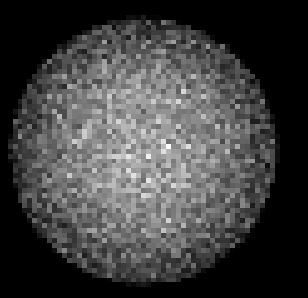

Wow! That's a far greater change than I was expecting! We're still in limb darkening, but the simple presence of even a little upper haze has caused the variation of the darkening to lessen, no more is it clean, now the result is grainy. Let's try increasing upper haze to 0.1, which I do expect to mostly remove the limb effects.

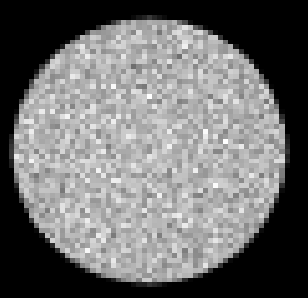

At this point the limb effects are completley removed. What if we do 1101 at 0.1 intensity, with 0.01 upper haze? Limb brightening or no limb effect?

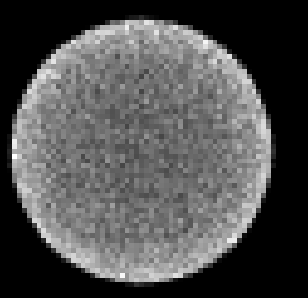

Limb brightening from a very optically thin atmosphere. All right, that answers that question.

Conclusions from adding upper haze: the upper haze smears out limb effects, even if present in very small amounts. However at small levels it does not smear them out completely. In future models we continue to act as though there is no haze in the upper atmosphere, as that is reasonable. 

Returning to base 1101, and now we start testing what happens when absorption varies with depth. Let's do a small increment first: upper absorption optical depth 0.5, lower 1. We will keep the haze at 1 for now.

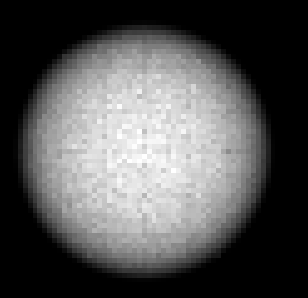

Limb darkening, but with less absorption higher up, the intensity of the darkening is less. Let's see how low it can go: 0.1 next.

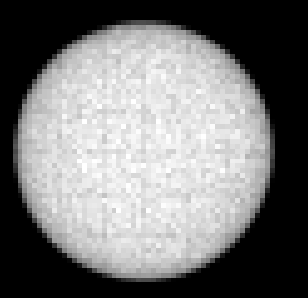

At this point with so little gas the limb darkening has all but vanished. I don't think there's any need to test 0.01, as that would just be the same as the "only lower layer" case here, effectively. (When concerned with limb effects).

Now, here's a question. What if we do this again, but with a lower haze optical depth? Say... 0.5 at first. 0.5 haze, 0.5 upper absorption:

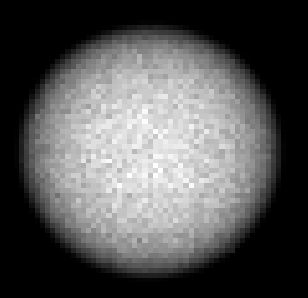

We have returned to strong limb darkening. It's comparable to when the haze was of optical depth 1. So what if we decrease the haze further, to 0.1? 

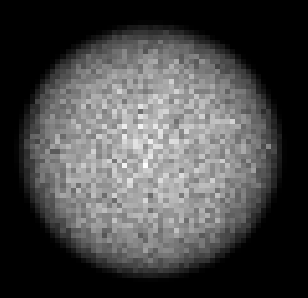

Limb darkening is still observed! In fact it's still strong, but the grainyness of the image indicates that we are approaching a uniform state. Let's see if 0.01 haze will turn us to a uniform disc or not. 

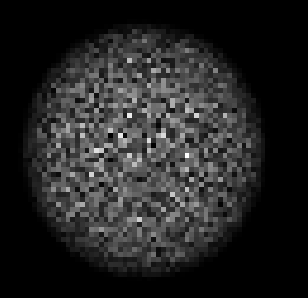

Even with almost no haze, the limb darkening still occurs! 

This is a good indicator of how things work. Limb darkening will occur whenever there is haze localized at a lower layer, and there is sufficient "thickness" in atmospheric absorption. But the moment we remove the haze entirely, we have a purely absorbing atmosphere that appears solid black and shows us nothing. If our understanding is correct, this effect will only be observed when the absorption optical depth is high. 

So, let's test that. Return to uniform absorption through the atmosphere, but start lowering it, and keep the haze at the low 0.01 value. 

Haze: 0.01. Absorption: 0.5 on both layers:

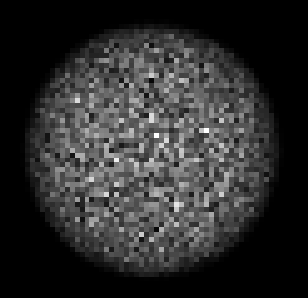

Limb darkening lessened but still occured. But 0.5 compounded four times will still be a significant optical depth. 0.1 should not be. 

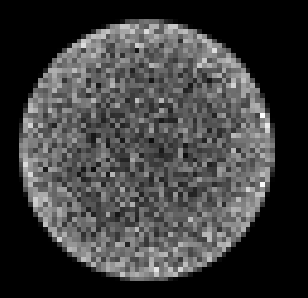

As expected we have reached limb brightening as the atmosphere is no longer optically thick. 

One last test remains, then. Can the limb darkening still be observed if the optical thickness comes from the haze alone and not the absorption? Set haze tau to 1, but let the absorption be 0.1.

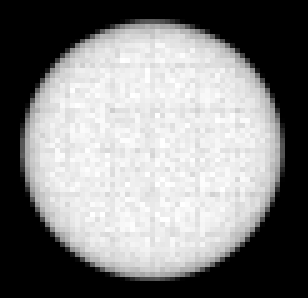

Hmm. The answer is 'maybe', there could be slight limb darkening here. Let's try increasing the absorption to 0.5.

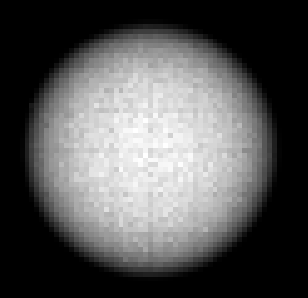

So yes there is limb darkening, but it appears that once the absorption becomes optically thin, it starts to vanish. If we set to 0.01, for instance...

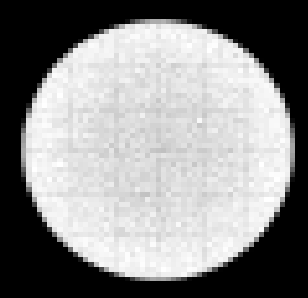

Hold on, we get *limb brightening*. Is that what we expect? Yes, if we look back at our original simulations at the top, pure haze will exhibit limb brightening when thick. (And thin.) 

Regardles, the following seems true: for limb darkening, you need significant absorption and *some* haze, but even a tiny amount of haze will do it. However the absorption must be significant, for if it's too low then limb brightening takes over from the haze. 

We have tested what happens when absorption is high and haze is high. But what of when both are lower? Can we get limb darkening in an optically thin regime? Our best bet for this is clearly starting from the high-absorption low-haze situation and lowering our absorption. 

Say we start at 0.5 absorption for each layer.

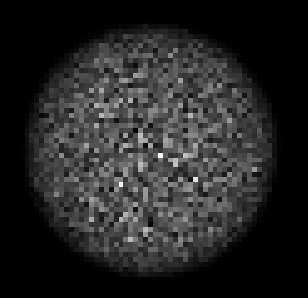

We still have limb darkening, but at this point we could still consider absorption optically thick. Let's go to 0.1.

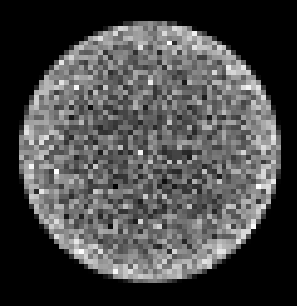

Nope, at this point we have limb brightening.

You know what, we're curious. Let's go outside the usual bounds of our experiment and set the haze to 0.001

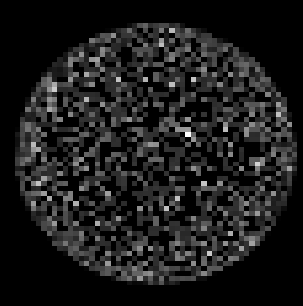

We appear to have lost all limb effects. Oh well. While we're here might as well test very very small haze with large limb darkening at 1 optical depth:

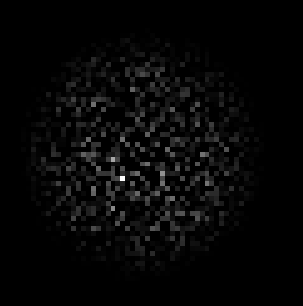

obvious darkening, but it's getting so extreme it's hard to see. Heh. 




ANYWAY, so we have these conclusions:

Limb Darkening: required optically thick absorption and some haze. The haze needs not to be much thicker than the absorption, else it will override it and provide limb brightening instead.

Limb Brightening: Occurs in atmospheres that are optically thin as a whole, or atmospheres where haze is the dominant contributor. 

## Very Optically Thick Regimes

We capped out our experiments at 1 tau previously, this is largely because big optical depths make the program really slow. However, we do have some time now, so we will perform a few select experiments at high optical depth. Namely, we wish to see if we can predict when limb darkening and brightening will occur at them. 

For instnace: we previously predicted that when haze is the dominant contributor, limb brightening will be observed. Let's see how far we have to dial up the haze's optical depth compared to an optical depth 1 absorption to achieve it, if we can. Start with an optical depth of 2 for the haze. (Keep in mind haze is just lower, upper haze is still at zero.)

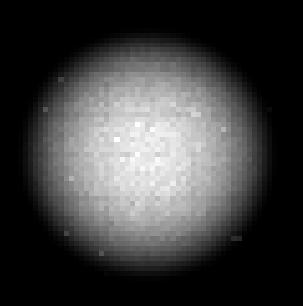

2 still darkens. What of 5? 

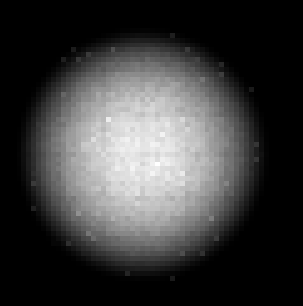

Still limb darkening, and in fact the intensity isn't changing at all. Fascinating! Let's set it to the maximum our normal reporting can handle: 9.99 for haze.

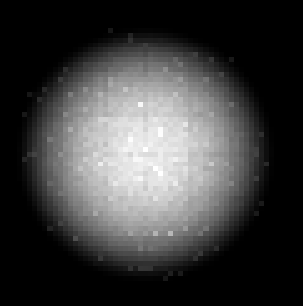

Fascinating! No change at all! I guess we simply don't need to run haze at high optical depths, since no matter how high it gets it can't overcome the gas absorption, and if gas absorption has low optical depth the haze is already dominating. THIS is why we check the high optical depth regime. 

Anyway, what other high optical depth regimes have not been examined? Low optical depth haze and high optical depth absorption is just going to make the disk darker. High haze and low absorption is just going to produce limb brightening. But what if both of the optical depths are large? We can divide this up into two sections: where the haze is optical depth one and we keep craking up the absorption (prediction: enhanced limb darkening) or where the haze is very high in optical depth and absorption is high as well (prediction: the same limb darkening). 

Let's go ahead and try it. dial everything to 9.99.

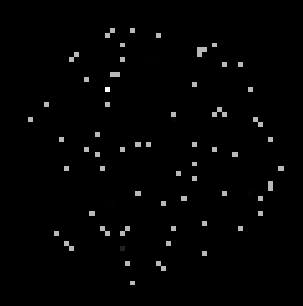

Oh. Uh. That might be too much absorption. Ehe. 

Let's dial it down to 5. ...Or 2 I guess... 

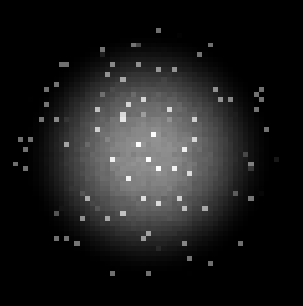

Hmm. This is a little unusual, we see some specks flying off at random intervals, but beneath that a very heavily limb darkened spot. Perhaps we will need to investigate to see if the specks are real, or just run a really intense simulation with a high resolution and see if they vanish like they should. Regardless, we can either accept or ignore the speckles, either way the limb darkening is clear. Also the intensity of absorption is ridiculous, never try to crank it up to high optical depths...

SO, in general:

ABSORPTION THICK, HAZE THICK: limb darkening. 

ABSORPTION THICK, HAZE THIN: limb darkening. 

ABSORPTION THIN, HAZE THICK: limb brightening.

ABSORPTION THIN, HAZE THIN: limb brightening.


Outlier cases: 

VERY THICK ABSORPTION: darkness (With speckles...?)

ZERO HAZE: darkness.

There is a line where limb effects vanish. Perhaps a function could be crafted to describe exactly where this is, where we switch from darkening to brightening. 

## More Information Needed

After the meeting it became apparent that we needed to get a bit more information, including examining regimes outside where we normally examined. And so I started out by creating a spreadsheet:

https://docs.google.com/spreadsheets/d/1imYOnUiEsnqMNKMDZQHFX-wR_HEMhuJSjD1BPDHvfWo/edit#gid=0

To store all simulation initial conditions, results for brightening/darkening, and also the "Max" value reported by Jcubeviewer, which gives a rough idea of how "intense" the picture is. Almost every run is either marked Brightening, Darkening, or Uniform based on the limb effects. There are a few unusual classes: Black (nothing shown) and Speckled (random assortment of photons). 

Anyway, the most important assumption we made, that the SSA value didn't change things, was qauestioned during the meeting, so now we shall consider runs as having six variables instead of just four. This will make things harder to fully explore, but here we go. The codes now have six numbers: 123456 for lower haze, lower SSA, lower gas absorption, upper haze, upper SSA, and upper gas absorption. We need to complete our list of primitives, that is, runs with only 1s and 0s. 

We note that if SSA is zero, the haze has no effect and does not do anything. (Sensible, as this means every scattering is perfectly absorbed). Arguably if the surface wasn't coal-black we would still see something, but we can say for sure that 0 SSA means there is no way for light to get back to us, we need *some* to get the effect. 

So basically for the primitive tests we have haze optical depth and SSA coupled, we just need to fill out the results with 1 SSA instead of 0.1.

Done, nothing surprising came up. So, now we have the biggest hole left from previous tests:
how does SSA affect the results? What if we vary it from top to bottom? 

Once again we return to our standard model, though we will be leaving it: 111001, which is to say the upper haze does not exist or is minimal. If we adjust SSA through the usual values, do we see changes from the default? 

So, when we look at 111001 with various values for the SSA (1, 0.5, 0.1, 0.01), we see the following:

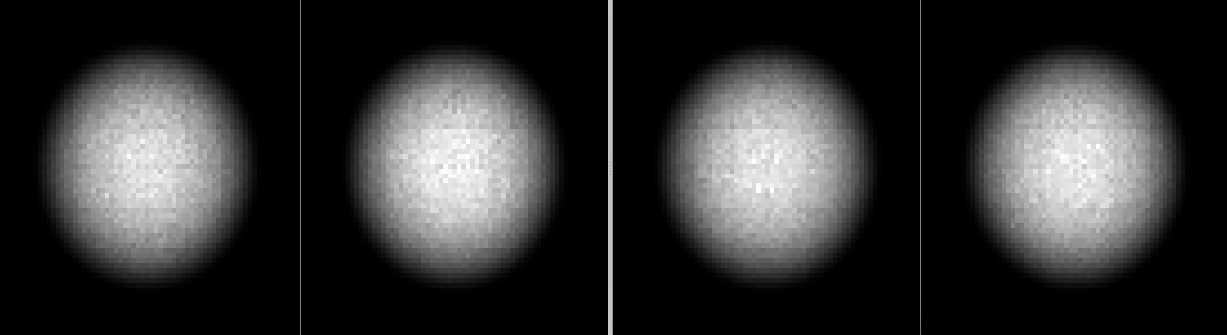

Always darkening. However, this does not tell the whole story, as while all these images look identical, there is a very real intensity difference: 0.010133, 0.004619, 0.000946, 9.11256e. (not sure what the e means but it only shows up on really dim things). 


Potential error: 

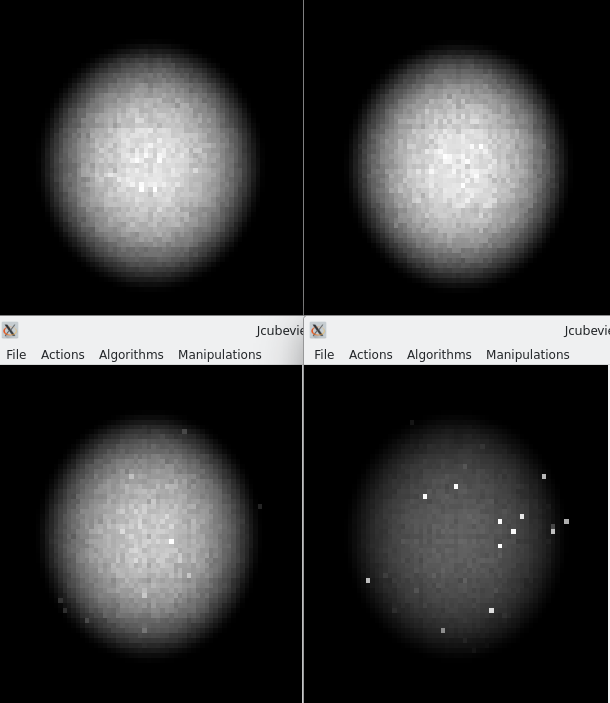

These simulations are the 0.1 and 0.01 SSA tests, except the bottom ones have an SSA set for a haze with optical depth 0. There should be no difference between the top and the bottom, but there is.

Obviously we can just avoid this by not providing nonsense numbers. AKA, SSA should be 0 when haze is zero. (Presumably the program jumps right to SSA when it scatters, ignoring the fact that there *is no haze* present).  Anyway so we had to redo those runs with the proper parameters. *MOST* of the time this isn't a problem because all it does is add occasional speckles scattering off nothing. If we look at our previous tests, the speckles are only noticably visible in the primitive tests, which we have already redone out of principle (and in fact was the reason we noticed a problem) and the optically thick regimes. 

Let's redo those optically thick images then why don't we? 

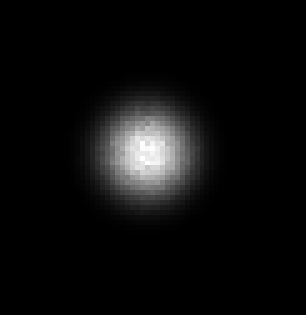

This is with every optical depth at 9.99 save upper haze, which is at zero. The SSA is 0.1. As we can see the speckles are gone and we just have extreme limb darkening. So all images with prominent speckles are to be disregarded; or the part of them that speckles anyway. If speckles are the brightest part of an image the "high" value will also be wrong. Very similar images appear for the other really high absorptions. 

I identified that the specles tend to arise at the 0.0001 magnitude level, so only those simulations absolutely require redoing. (They are marked in red on the spreadsheet).




So, SSA adjustments change the intensity... when we're in the optically thick regime. Let's try the optically thin regime, set everything to 0.1 except the SSA, which we will ajust from 1 to 0.5 to 0.1 to 0.01, and see.

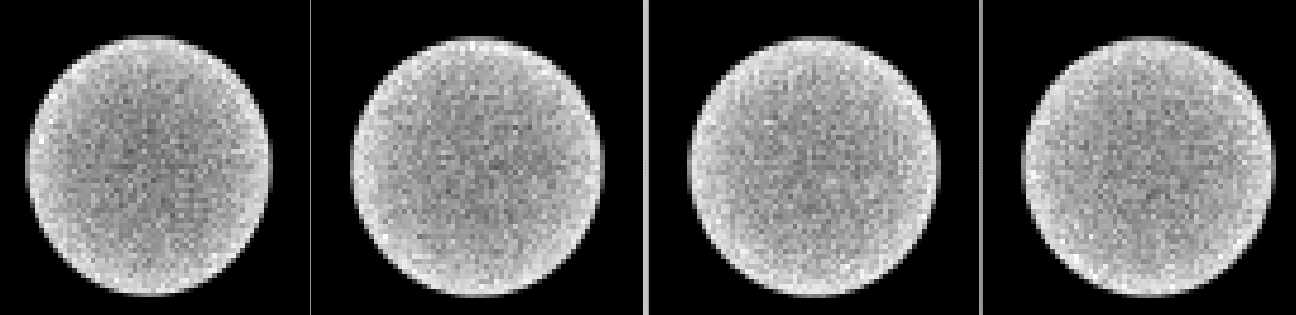

Once again, relatively speaking no change at all. But the "High" values are in fact different: 0.033753 0.015847 0.00303 0.000306. This seems pretty conclusive that uniform adjustments don't do anything. And we previously didn't worry about variation in SSA between the two layers because the top layer was generally ignored. However, we won't be doing this in the future. So now... let's consider situations in which we do have a top layer of haze. 



So while we may have tested this before, it was at SSA 0.1, which is somewhat low, so we'll redo everythihng with SSA of 1 in both cases before we start varying. Furthermore we shall test in both the optically thin and optically thick absorbing regimes. Starting with thick, of course. 

The goal for testing haze here is to get every combination of nonzero haze using 0.01, 0.1, 0.5, and 1. We will, naturally, later do this for absorption as well, though that's a long way off yet.

So, as most of the images look the same (either Brightening, Darkening, or Iniform) there's not gonna be as many images this time around as most kind of look the same. Conclusions we've drawn from the tests: in the thick absorption regime, darkening can occur, but in the thin absorption regime, brightening can occur. No darkening occured when absorption was thin, and no brightening occured when absorption was thick. There were, however a *lot* of uniform results in this test. Now, to some extent this was expected, since we saw in earlier tests that if the dominant haze layer is on top, the limb effects tend to dissipate. All limb darkening required the upper haze to be singificantly stronger than the lower haze. This is NOT the case for Limb Brightening, which can occur with a strong upper haze layer. In fact there's the unusual case of the Upper haze drops to near zero but the lower haze is veyr large. This one test doesn't follow the patterns of the others, and in fact at SSA 0.1 it supposedly darkens. 

This one test's preciese numbers are 1 1 0.1 0.01 1 0.1 , producing a uniform. We tried a similar test before with 0.1 SSA and 0 lower gas absorption. Let's try adjusting the SSA so our numbers read 1 0.1 0.1 0.01 0.1 0.1. If my predictions are correct, this should produce darkening. But no, it's distinctly Uniform! (maybe very slight darkening). Once again the only difference is a decrease in "high." 

All this is entirely moot because the "darkening" on the original test was very slight if at all and I've set it to "uniform." So this was all a wild goose chase. 

Anyway, now let's see if we can adjust the SSA to get special results. Notably we're going to try to see if we can get *darkening* caused from two equal optical depths with different SSA. Darkening requires optially thick absorption, so we shall start there. (And naturally go to optically thin afterward). We shall set each haze layer to an equal optical depth, 1 in this case, and see if we can "reduce" it sufficiently with SSA. Basically the initial condition we alter is 11111 and see what we can get. 